<a href="https://colab.research.google.com/github/hitmanrj/Projeccts/blob/main/Facial_Emotion_Recognition_using_CNN_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# .

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hitmanlegacy","key":"00ea9944c310eaf1d21098b552df2370"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 92% 111M/121M [00:00<00:00, 140MB/s] 
100% 121M/121M [00:00<00:00, 139MB/s]


# **Facial Expression detection using CNN**

Importing the image dataset

In [ ]:
import zipfile
path='data/rohan'
with zipfile.ZipFile('face-expression-recognition-dataset.zip','r') as z:
  z.extractall(path)

In [ ]:
import os

folder_path = '/content/data/rohan/images/'

data = os.listdir(folder_path)

print(data)

['validation', 'train', 'images']


Importing all the required assets

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import DepthwiseConv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling2D
from keras.models import Model, Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import rmsprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [ ]:
picture_size = 48 #setting up the size to 48

Showing up the processed data for training

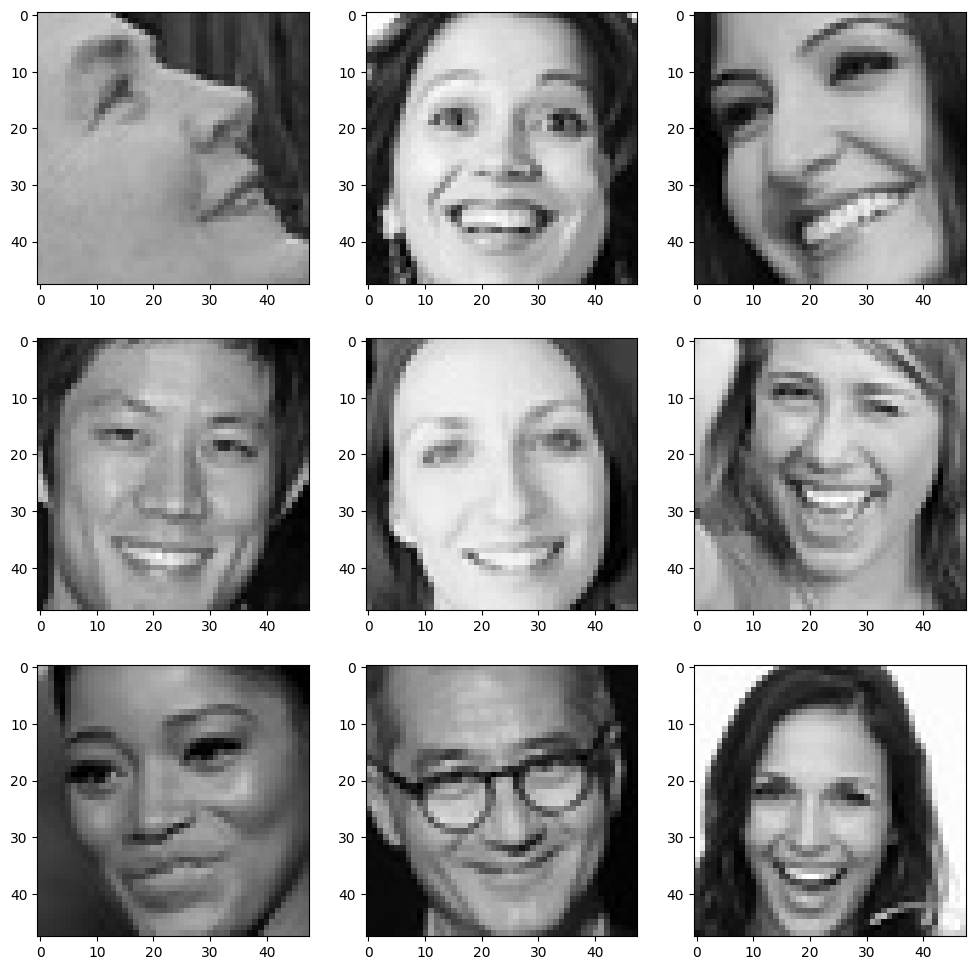

In [ ]:
expression = 'happy'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path+"train/"+expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()

Traing, Testing and splitting the dataset

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Creating the CNN Model

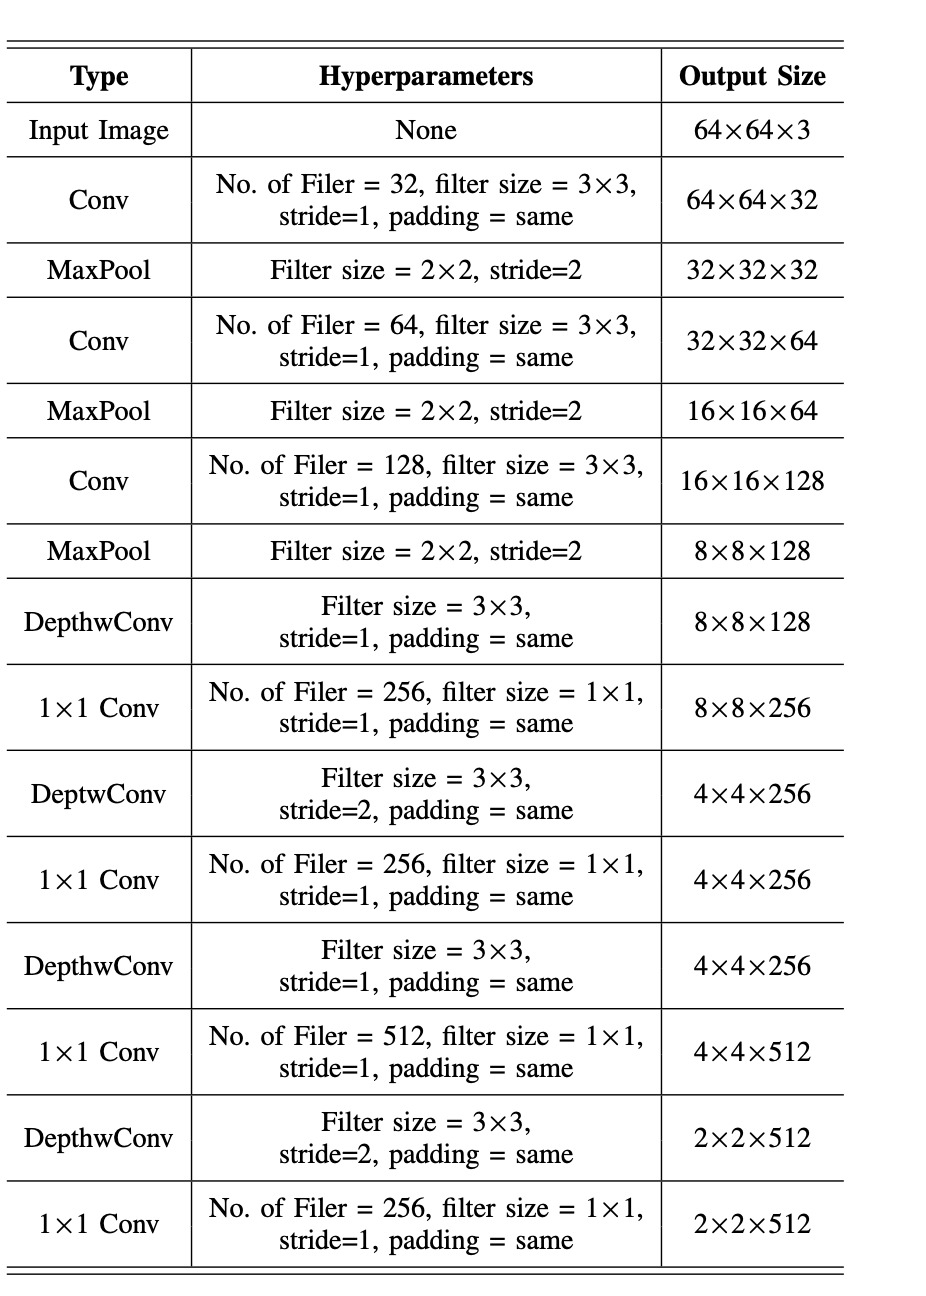

#  Relu Activation Function

In [ ]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th layer with Depthwise Convolution
model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

#5th layer with Depthwise Convolution
model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False))
model.add(Dropout (0.25))

#6th layer with Depthwise Convolution
model.add(Conv2D(512,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))


#7th layer with Depthwise Convolution
model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        5

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history3 = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-18-ba689043f3cf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model.fit_generator(generator=train_set,


Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 1.9254 - accuracy: 0.2379

225/225 [==============================] - 31s 63ms/step - loss: 1.9254 - accuracy: 0.2379 - val_loss: 1.8199 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 1.6814 - accuracy: 0.3490

225/225 [==============================] - 13s 59ms/step - loss: 1.6814 - accuracy: 0.3490 - val_loss: 1.8621 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 3/20
224/225 [============================>.] - ETA: 0s - loss: 1.5554 - accuracy: 0.3982

225/225 [==============================] - 13s 59ms/step - loss: 1.5555 - accuracy: 0.3981 - val_loss: 1.5414 - val_accuracy: 0.4119 - lr: 0.0010
Epoch 4/20
224/225 [============================>.] - ETA: 0s - loss: 1.4616 - accuracy: 0.4377

225/225 [==============================] - 13s 56ms/step - loss: 1.4620 - accuracy: 0.4376 - val_loss: 1.5430 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 5/20
225/225 [==============================] - ETA: 0s - loss: 1.3946 - accuracy: 0.4613

225/225 [==============================] - 12s 55ms/step - loss: 1.3946 - accuracy: 0.4613 - val_loss: 1.3902 - val_accuracy: 0.4700 - lr: 0.0010
Epoch 6/20
225/225 [==============================] - ETA: 0s - loss: 1.3358 - accuracy: 0.4832

225/225 [==============================] - 13s 57ms/step - loss: 1.3358 - accuracy: 0.4832 - val_loss: 1.3417 - val_accuracy: 0.4861 - lr: 0.0010
Epoch 7/20
224/225 [============================>.] - ETA: 0s - loss: 1.2979 - accuracy: 0.5028

225/225 [==============================] - 12s 55ms/step - loss: 1.2978 - accuracy: 0.5028 - val_loss: 1.3350 - val_accuracy: 0.4884 - lr: 0.0010
Epoch 8/20
225/225 [==============================] - ETA: 0s - loss: 1.2650 - accuracy: 0.5149

225/225 [==============================] - 13s 60ms/step - loss: 1.2650 - accuracy: 0.5149 - val_loss: 1.4427 - val_accuracy: 0.4805 - lr: 0.0010
Epoch 9/20
225/225 [==============================] - ETA: 0s - loss: 1.2414 - accuracy: 0.5278

225/225 [==============================] - 13s 55ms/step - loss: 1.2414 - accuracy: 0.5278 - val_loss: 1.2301 - val_accuracy: 0.5322 - lr: 0.0010
Epoch 10/20
224/225 [============================>.] - ETA: 0s - loss: 1.2082 - accuracy: 0.5420

225/225 [==============================] - 12s 55ms/step - loss: 1.2079 - accuracy: 0.5420 - val_loss: 1.4029 - val_accuracy: 0.4757 - lr: 0.0010
Epoch 11/20
224/225 [============================>.] - ETA: 0s - loss: 1.1903 - accuracy: 0.5486

225/225 [==============================] - 13s 59ms/step - loss: 1.1905 - accuracy: 0.5486 - val_loss: 1.1429 - val_accuracy: 0.5693 - lr: 0.0010
Epoch 12/20
224/225 [============================>.] - ETA: 0s - loss: 1.1658 - accuracy: 0.5541

225/225 [==============================] - 13s 59ms/step - loss: 1.1659 - accuracy: 0.5540 - val_loss: 1.2048 - val_accuracy: 0.5460 - lr: 0.0010
Epoch 13/20
225/225 [==============================] - ETA: 0s - loss: 1.1482 - accuracy: 0.5640

225/225 [==============================] - 13s 60ms/step - loss: 1.1482 - accuracy: 0.5640 - val_loss: 1.1394 - val_accuracy: 0.5693 - lr: 0.0010
Epoch 14/20
224/225 [============================>.] - ETA: 0s - loss: 1.1367 - accuracy: 0.5684

225/225 [==============================] - 12s 55ms/step - loss: 1.1365 - accuracy: 0.5686 - val_loss: 1.1547 - val_accuracy: 0.5602 - lr: 0.0010
Epoch 15/20
225/225 [==============================] - ETA: 0s - loss: 1.1134 - accuracy: 0.5790

225/225 [==============================] - 12s 55ms/step - loss: 1.1134 - accuracy: 0.5790 - val_loss: 1.0989 - val_accuracy: 0.5845 - lr: 0.0010
Epoch 16/20
224/225 [============================>.] - ETA: 0s - loss: 1.0964 - accuracy: 0.5857

225/225 [==============================] - 12s 55ms/step - loss: 1.0958 - accuracy: 0.5860 - val_loss: 1.2312 - val_accuracy: 0.5341 - lr: 0.0010
Epoch 17/20
225/225 [==============================] - ETA: 0s - loss: 1.0798 - accuracy: 0.5928

225/225 [==============================] - 13s 56ms/step - loss: 1.0798 - accuracy: 0.5928 - val_loss: 1.1290 - val_accuracy: 0.5780 - lr: 0.0010
Epoch 18/20
225/225 [==============================] - ETA: 0s - loss: 1.0663 - accuracy: 0.5950Restoring model weights from the end of the best epoch: 15.



Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 13s 60ms/step - loss: 1.0663 - accuracy: 0.5950 - val_loss: 1.1030 - val_accuracy: 0.5916 - lr: 0.0010
Epoch 18: early stopping


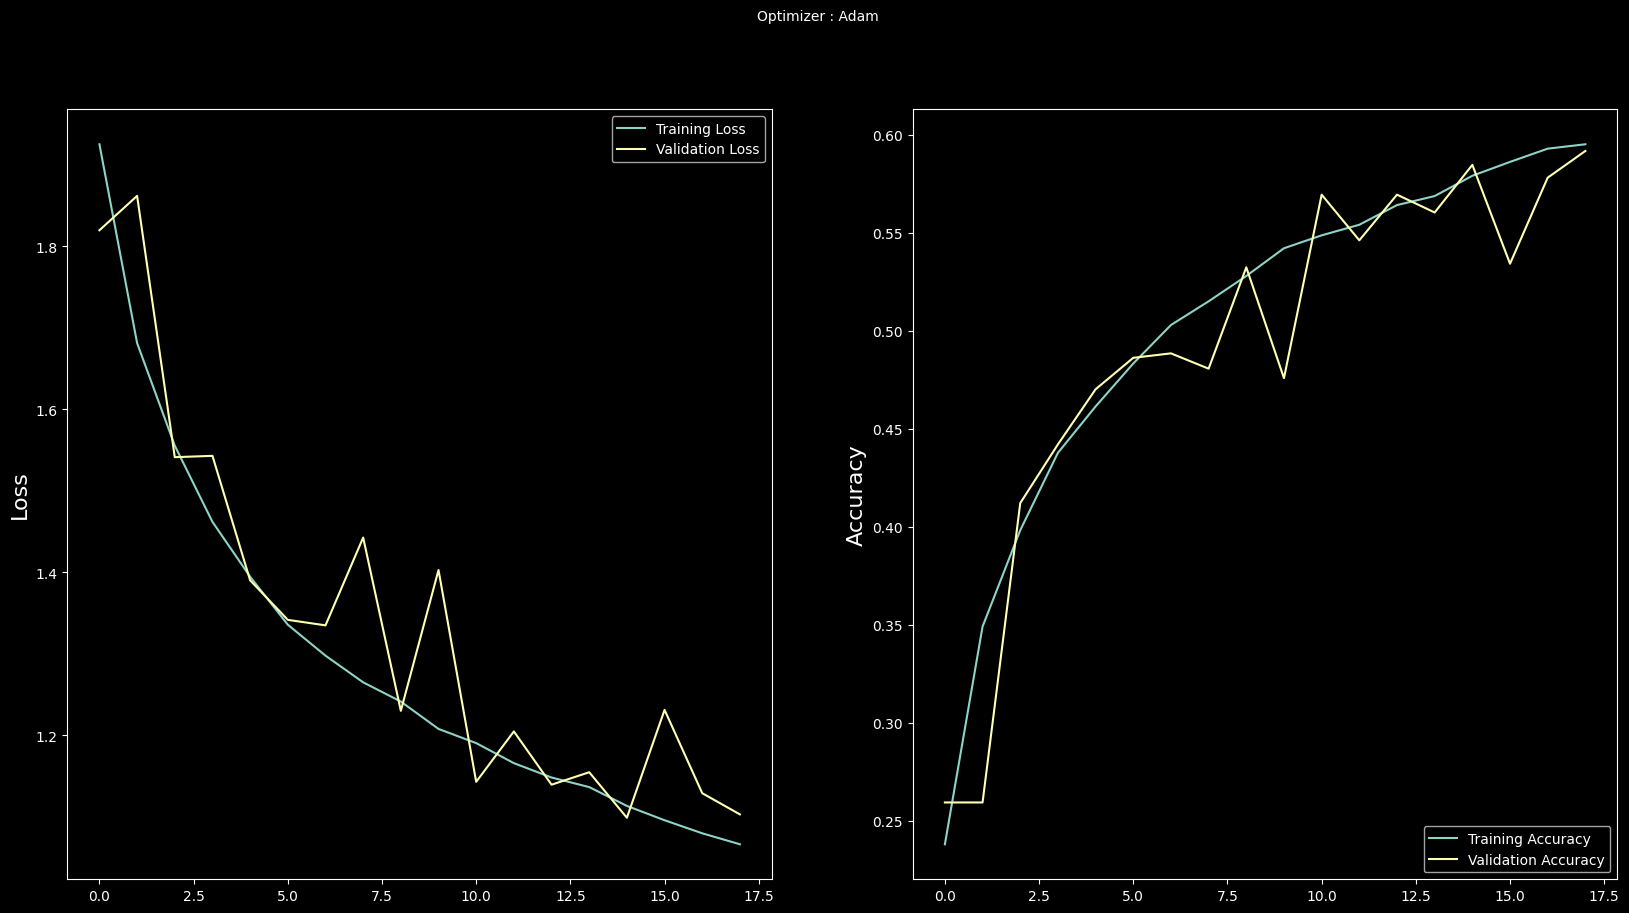

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Tanh Activation Function

In [ ]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Conv2D(512,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history2 = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-25-ad5d0fac6ca6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model.fit_generator(generator=train_set,


Epoch 1/20
224/225 [============================>.] - ETA: 0s - loss: 1.8796 - accuracy: 0.2807

225/225 [==============================] - 19s 57ms/step - loss: 1.8788 - accuracy: 0.2811 - val_loss: 1.8459 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/20
224/225 [============================>.] - ETA: 0s - loss: 1.6600 - accuracy: 0.3581

225/225 [==============================] - 13s 56ms/step - loss: 1.6593 - accuracy: 0.3585 - val_loss: 1.6376 - val_accuracy: 0.3766 - lr: 0.0010
Epoch 3/20
225/225 [==============================] - ETA: 0s - loss: 1.5601 - accuracy: 0.3977

225/225 [==============================] - 13s 59ms/step - loss: 1.5601 - accuracy: 0.3977 - val_loss: 1.6017 - val_accuracy: 0.4053 - lr: 0.0010
Epoch 4/20
224/225 [============================>.] - ETA: 0s - loss: 1.4865 - accuracy: 0.4272

225/225 [==============================] - 13s 59ms/step - loss: 1.4870 - accuracy: 0.4270 - val_loss: 1.5260 - val_accuracy: 0.4237 - lr: 0.0010
Epoch 5/20
224/225 [============================>.] - ETA: 0s - loss: 1.4258 - accuracy: 0.4538

225/225 [==============================] - 12s 55ms/step - loss: 1.4261 - accuracy: 0.4535 - val_loss: 1.3719 - val_accuracy: 0.4760 - lr: 0.0010
Epoch 6/20
225/225 [==============================] - ETA: 0s - loss: 1.3804 - accuracy: 0.4618

225/225 [==============================] - 13s 56ms/step - loss: 1.3804 - accuracy: 0.4618 - val_loss: 1.6190 - val_accuracy: 0.3864 - lr: 0.0010
Epoch 7/20
224/225 [============================>.] - ETA: 0s - loss: 1.3435 - accuracy: 0.4825

225/225 [==============================] - 13s 59ms/step - loss: 1.3437 - accuracy: 0.4824 - val_loss: 1.4656 - val_accuracy: 0.4642 - lr: 0.0010
Epoch 8/20
225/225 [==============================] - ETA: 0s - loss: 1.3138 - accuracy: 0.4919

225/225 [==============================] - 13s 60ms/step - loss: 1.3138 - accuracy: 0.4919 - val_loss: 1.3070 - val_accuracy: 0.5119 - lr: 0.0010
Epoch 9/20
225/225 [==============================] - ETA: 0s - loss: 1.2923 - accuracy: 0.5028

225/225 [==============================] - 13s 60ms/step - loss: 1.2923 - accuracy: 0.5028 - val_loss: 1.2750 - val_accuracy: 0.5081 - lr: 0.0010
Epoch 10/20
225/225 [==============================] - ETA: 0s - loss: 1.2678 - accuracy: 0.5141

225/225 [==============================] - 13s 59ms/step - loss: 1.2678 - accuracy: 0.5141 - val_loss: 1.3192 - val_accuracy: 0.5006 - lr: 0.0010
Epoch 11/20
224/225 [============================>.] - ETA: 0s - loss: 1.2538 - accuracy: 0.5185

225/225 [==============================] - 12s 55ms/step - loss: 1.2537 - accuracy: 0.5186 - val_loss: 1.2700 - val_accuracy: 0.5220 - lr: 0.0010
Epoch 12/20
224/225 [============================>.] - ETA: 0s - loss: 1.2303 - accuracy: 0.5304

225/225 [==============================] - 13s 56ms/step - loss: 1.2299 - accuracy: 0.5307 - val_loss: 1.2637 - val_accuracy: 0.5244 - lr: 0.0010
Epoch 13/20
225/225 [==============================] - ETA: 0s - loss: 1.2054 - accuracy: 0.5402

225/225 [==============================] - 12s 55ms/step - loss: 1.2054 - accuracy: 0.5402 - val_loss: 1.2861 - val_accuracy: 0.5210 - lr: 0.0010
Epoch 14/20
225/225 [==============================] - ETA: 0s - loss: 1.1909 - accuracy: 0.5481

225/225 [==============================] - 13s 56ms/step - loss: 1.1909 - accuracy: 0.5481 - val_loss: 1.2560 - val_accuracy: 0.5315 - lr: 0.0010
Epoch 15/20
225/225 [==============================] - ETA: 0s - loss: 1.1795 - accuracy: 0.5497

225/225 [==============================] - 12s 55ms/step - loss: 1.1795 - accuracy: 0.5497 - val_loss: 1.2079 - val_accuracy: 0.5447 - lr: 0.0010
Epoch 16/20
224/225 [============================>.] - ETA: 0s - loss: 1.1619 - accuracy: 0.5528

225/225 [==============================] - 13s 56ms/step - loss: 1.1615 - accuracy: 0.5529 - val_loss: 1.2239 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 17/20
225/225 [==============================] - ETA: 0s - loss: 1.1471 - accuracy: 0.5590

225/225 [==============================] - 12s 55ms/step - loss: 1.1471 - accuracy: 0.5590 - val_loss: 1.2170 - val_accuracy: 0.5491 - lr: 0.0010
Epoch 18/20
224/225 [============================>.] - ETA: 0s - loss: 1.1338 - accuracy: 0.5686

225/225 [==============================] - 12s 55ms/step - loss: 1.1335 - accuracy: 0.5689 - val_loss: 1.1890 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 19/20
225/225 [==============================] - ETA: 0s - loss: 1.1214 - accuracy: 0.5747

225/225 [==============================] - 13s 59ms/step - loss: 1.1214 - accuracy: 0.5747 - val_loss: 1.1862 - val_accuracy: 0.5568 - lr: 0.0010
Epoch 20/20
224/225 [============================>.] - ETA: 0s - loss: 1.1048 - accuracy: 0.5818

225/225 [==============================] - 12s 55ms/step - loss: 1.1048 - accuracy: 0.5816 - val_loss: 1.1496 - val_accuracy: 0.5719 - lr: 0.0010


#SoftMax Activation function

In [ ]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Conv2D(512,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Conv2D(256,(1,1),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
model.add(Dropout (0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_18 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 64)       

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history1 = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

<ipython-input-31-74f6422706ce>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(generator=train_set,


Epoch 1/20
224/225 [============================>.] - ETA: 0s - loss: 1.8996 - accuracy: 0.2476

225/225 [==============================] - 20s 62ms/step - loss: 1.8994 - accuracy: 0.2476 - val_loss: 1.8647 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 1.8505 - accuracy: 0.2484

225/225 [==============================] - 13s 56ms/step - loss: 1.8505 - accuracy: 0.2484 - val_loss: 1.8344 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 3/20
225/225 [==============================] - ETA: 0s - loss: 1.8309 - accuracy: 0.2486

225/225 [==============================] - 13s 58ms/step - loss: 1.8309 - accuracy: 0.2486 - val_loss: 1.8217 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 4/20
224/225 [============================>.] - ETA: 0s - loss: 1.8219 - accuracy: 0.2485

225/225 [==============================] - 13s 58ms/step - loss: 1.8218 - accuracy: 0.2486 - val_loss: 1.8151 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 5/20
225/225 [==============================] - ETA: 0s - loss: 1.8170 - accuracy: 0.2484

225/225 [==============================] - 13s 57ms/step - loss: 1.8170 - accuracy: 0.2484 - val_loss: 1.8116 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 6/20
225/225 [==============================] - ETA: 0s - loss: 1.8142 - accuracy: 0.2486

225/225 [==============================] - 13s 57ms/step - loss: 1.8142 - accuracy: 0.2486 - val_loss: 1.8098 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 7/20
225/225 [==============================] - ETA: 0s - loss: 1.8129 - accuracy: 0.2485

225/225 [==============================] - 13s 56ms/step - loss: 1.8129 - accuracy: 0.2485 - val_loss: 1.8086 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 8/20
225/225 [==============================] - ETA: 0s - loss: 1.8117 - accuracy: 0.2486

225/225 [==============================] - 13s 57ms/step - loss: 1.8117 - accuracy: 0.2486 - val_loss: 1.8079 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 9/20
225/225 [==============================] - ETA: 0s - loss: 1.8115 - accuracy: 0.2488

225/225 [==============================] - 13s 56ms/step - loss: 1.8115 - accuracy: 0.2488 - val_loss: 1.8077 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 10/20
224/225 [============================>.] - ETA: 0s - loss: 1.8108 - accuracy: 0.2489

225/225 [==============================] - 13s 57ms/step - loss: 1.8108 - accuracy: 0.2491 - val_loss: 1.8076 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 11/20
224/225 [============================>.] - ETA: 0s - loss: 1.8107 - accuracy: 0.2488

225/225 [==============================] - 13s 57ms/step - loss: 1.8109 - accuracy: 0.2486 - val_loss: 1.8076 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 12/20
224/225 [============================>.] - ETA: 0s - loss: 1.8109 - accuracy: 0.2488

225/225 [==============================] - 13s 57ms/step - loss: 1.8109 - accuracy: 0.2486 - val_loss: 1.8076 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 13/20
225/225 [==============================] - ETA: 0s - loss: 1.8108 - accuracy: 0.2486

225/225 [==============================] - 13s 56ms/step - loss: 1.8108 - accuracy: 0.2486 - val_loss: 1.8076 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 14/20
225/225 [==============================] - ETA: 0s - loss: 1.8109 - accuracy: 0.2485

225/225 [==============================] - 12s 55ms/step - loss: 1.8109 - accuracy: 0.2485 - val_loss: 1.8075 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 15/20
225/225 [==============================] - ETA: 0s - loss: 1.8111 - accuracy: 0.2484

225/225 [==============================] - 12s 55ms/step - loss: 1.8111 - accuracy: 0.2484 - val_loss: 1.8074 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 16/20
225/225 [==============================] - ETA: 0s - loss: 1.8109 - accuracy: 0.2484

225/225 [==============================] - 13s 56ms/step - loss: 1.8109 - accuracy: 0.2484 - val_loss: 1.8073 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 17/20
225/225 [==============================] - ETA: 0s - loss: 1.8110 - accuracy: 0.2487

225/225 [==============================] - 13s 56ms/step - loss: 1.8110 - accuracy: 0.2487 - val_loss: 1.8075 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 18/20
225/225 [==============================] - ETA: 0s - loss: 1.8111 - accuracy: 0.2483

225/225 [==============================] - 12s 55ms/step - loss: 1.8111 - accuracy: 0.2483 - val_loss: 1.8076 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 19/20
225/225 [==============================] - ETA: 0s - loss: 1.8108 - accuracy: 0.2487Restoring model weights from the end of the best epoch: 16.



Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 13s 59ms/step - loss: 1.8108 - accuracy: 0.2487 - val_loss: 1.8077 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 19: early stopping


# Comparitive Analysis

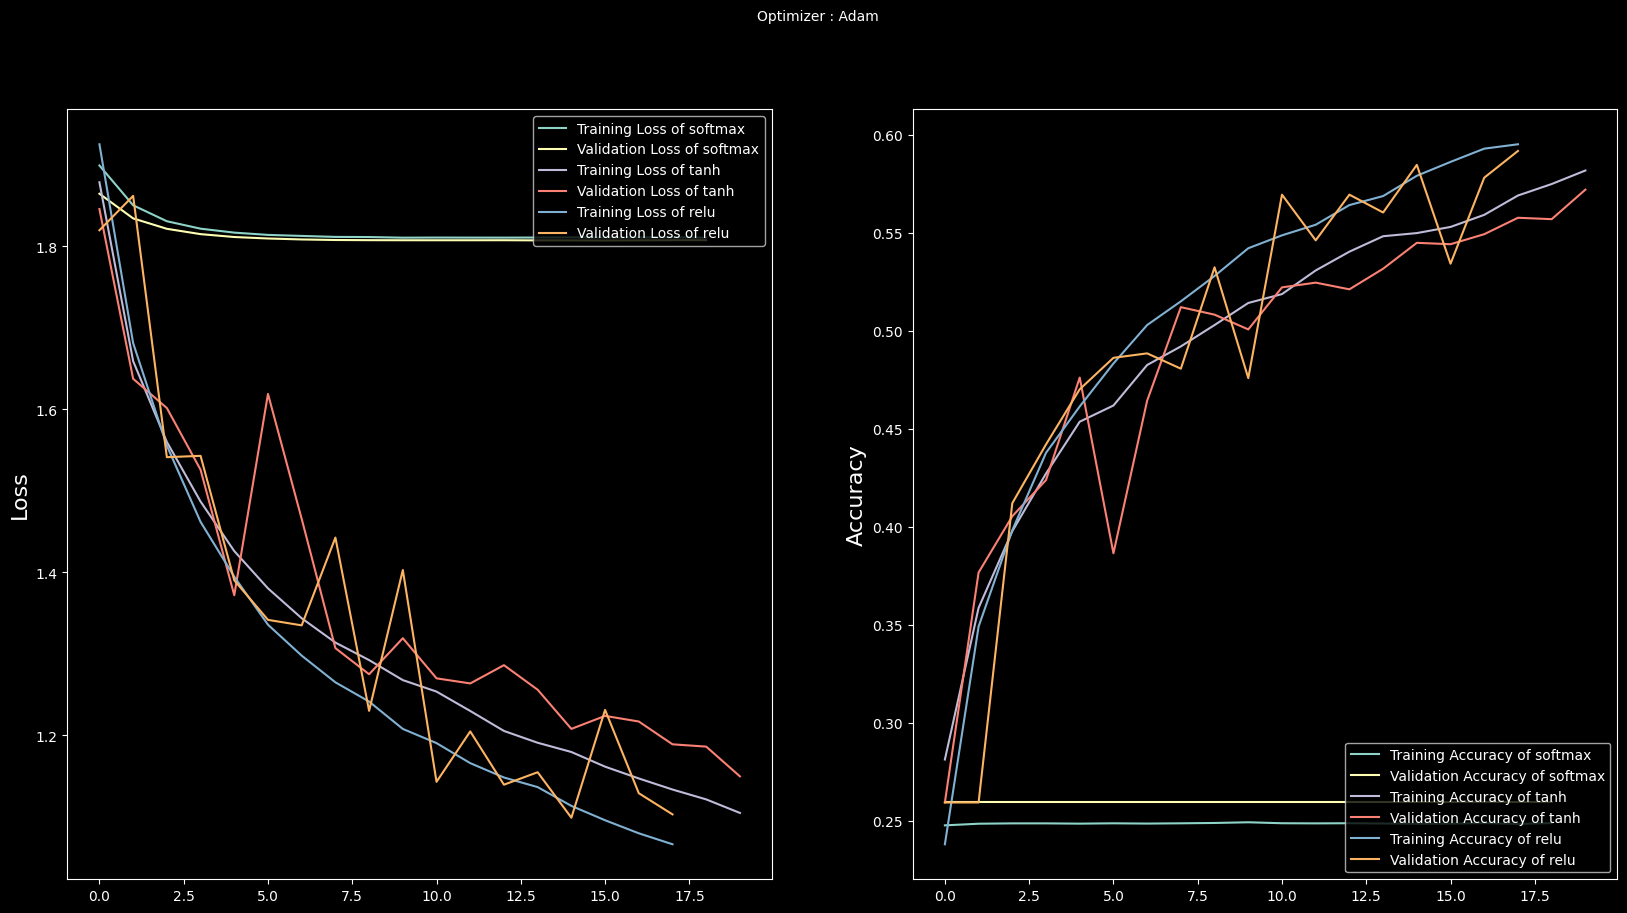

In [ ]:

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)

plt.plot(history1.history['loss'], label='Training Loss of softmax')
plt.plot(history1.history['val_loss'], label='Validation Loss of softmax')

plt.plot(history2.history['loss'], label='Training Loss of tanh')
plt.plot(history2.history['val_loss'], label='Validation Loss of tanh')

plt.plot(history3.history['loss'], label='Training Loss of relu')
plt.plot(history3.history['val_loss'], label='Validation Loss of relu')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history1.history['accuracy'], label='Training Accuracy of softmax')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy of softmax')

plt.plot(history2.history['accuracy'], label='Training Accuracy of tanh')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy of tanh')

plt.plot(history3.history['accuracy'], label='Training Accuracy of relu')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy of relu')

plt.legend(loc='lower right')
plt.show()

- According to the accuracy and the loss Relu activation function has performed better as compared to Tanh and SoftMax
- Relu doesn't allow for the activation of all of the neurons at the same time
- For example: if any input is negative, ReLU converts it to zero and doesn't allow the neuron to get activated. This means that only a few neurons are activated, making the network easy for computation.


In [ ]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history4 = model.fit_generator(generator=train_set,
                      steps_per_epoch=train_set.n//train_set.batch_size,
                      epochs=epochs,
                      validation_data = test_set,
                      validation_steps = test_set.n//test_set.batch_size,
                      callbacks=callbacks_list)

Epoch 1/20


<ipython-input-37-91390193e4ca>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model.fit_generator(generator=train_set,


224/225 [============================>.] - ETA: 0s - loss: 1.7687 - accuracy: 0.3251

225/225 [==============================] - 16s 56ms/step - loss: 1.7678 - accuracy: 0.3255 - val_loss: 1.5534 - val_accuracy: 0.4007 - lr: 0.0010
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 1.4792 - accuracy: 0.4303

225/225 [==============================] - 12s 52ms/step - loss: 1.4792 - accuracy: 0.4303 - val_loss: 1.3844 - val_accuracy: 0.4663 - lr: 0.0010
Epoch 3/20
224/225 [============================>.] - ETA: 0s - loss: 1.3463 - accuracy: 0.4793

225/225 [==============================] - 12s 55ms/step - loss: 1.3459 - accuracy: 0.4792 - val_loss: 1.3492 - val_accuracy: 0.4787 - lr: 0.0010
Epoch 4/20
225/225 [==============================] - ETA: 0s - loss: 1.2614 - accuracy: 0.5164

225/225 [==============================] - 12s 53ms/step - loss: 1.2614 - accuracy: 0.5164 - val_loss: 1.2494 - val_accuracy: 0.5205 - lr: 0.0010
Epoch 5/20
224/225 [============================>.] - ETA: 0s - loss: 1.2070 - accuracy: 0.5402

225/225 [==============================] - 13s 56ms/step - loss: 1.2065 - accuracy: 0.5401 - val_loss: 1.2034 - val_accuracy: 0.5453 - lr: 0.0010
Epoch 6/20
224/225 [============================>.] - ETA: 0s - loss: 1.1629 - accuracy: 0.5581

225/225 [==============================] - 12s 51ms/step - loss: 1.1626 - accuracy: 0.5581 - val_loss: 1.2200 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 7/20
224/225 [============================>.] - ETA: 0s - loss: 1.1222 - accuracy: 0.5750

225/225 [==============================] - 11s 50ms/step - loss: 1.1217 - accuracy: 0.5750 - val_loss: 1.1371 - val_accuracy: 0.5696 - lr: 0.0010
Epoch 8/20
224/225 [============================>.] - ETA: 0s - loss: 1.0812 - accuracy: 0.5904

225/225 [==============================] - 11s 51ms/step - loss: 1.0804 - accuracy: 0.5905 - val_loss: 1.1126 - val_accuracy: 0.5817 - lr: 0.0010
Epoch 9/20
225/225 [==============================] - ETA: 0s - loss: 1.0428 - accuracy: 0.6051

225/225 [==============================] - 12s 55ms/step - loss: 1.0428 - accuracy: 0.6051 - val_loss: 1.1375 - val_accuracy: 0.5717 - lr: 0.0010
Epoch 10/20
225/225 [==============================] - ETA: 0s - loss: 1.0106 - accuracy: 0.6175

225/225 [==============================] - 12s 52ms/step - loss: 1.0106 - accuracy: 0.6175 - val_loss: 1.1182 - val_accuracy: 0.5884 - lr: 0.0010
Epoch 11/20
224/225 [============================>.] - ETA: 0s - loss: 0.9773 - accuracy: 0.6265

225/225 [==============================] - 11s 50ms/step - loss: 0.9777 - accuracy: 0.6264 - val_loss: 1.0765 - val_accuracy: 0.6004 - lr: 0.0010
Epoch 12/20
225/225 [==============================] - ETA: 0s - loss: 0.9449 - accuracy: 0.6440

225/225 [==============================] - 12s 52ms/step - loss: 0.9449 - accuracy: 0.6440 - val_loss: 1.0890 - val_accuracy: 0.5983 - lr: 0.0010
Epoch 13/20
224/225 [============================>.] - ETA: 0s - loss: 0.9073 - accuracy: 0.6578

225/225 [==============================] - 11s 50ms/step - loss: 0.9076 - accuracy: 0.6577 - val_loss: 1.1117 - val_accuracy: 0.5969 - lr: 0.0010
Epoch 14/20
225/225 [==============================] - ETA: 0s - loss: 0.8711 - accuracy: 0.6740Restoring model weights from the end of the best epoch: 11.



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 13s 56ms/step - loss: 0.8711 - accuracy: 0.6740 - val_loss: 1.1221 - val_accuracy: 0.6006 - lr: 0.0010
Epoch 14: early stopping


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_27 (Ba  (None, 48, 48, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_27 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 64)       

In [ ]:
pred = []
pred_data = '/content/data/rohan/images/validation/disgust/11222.jpg'

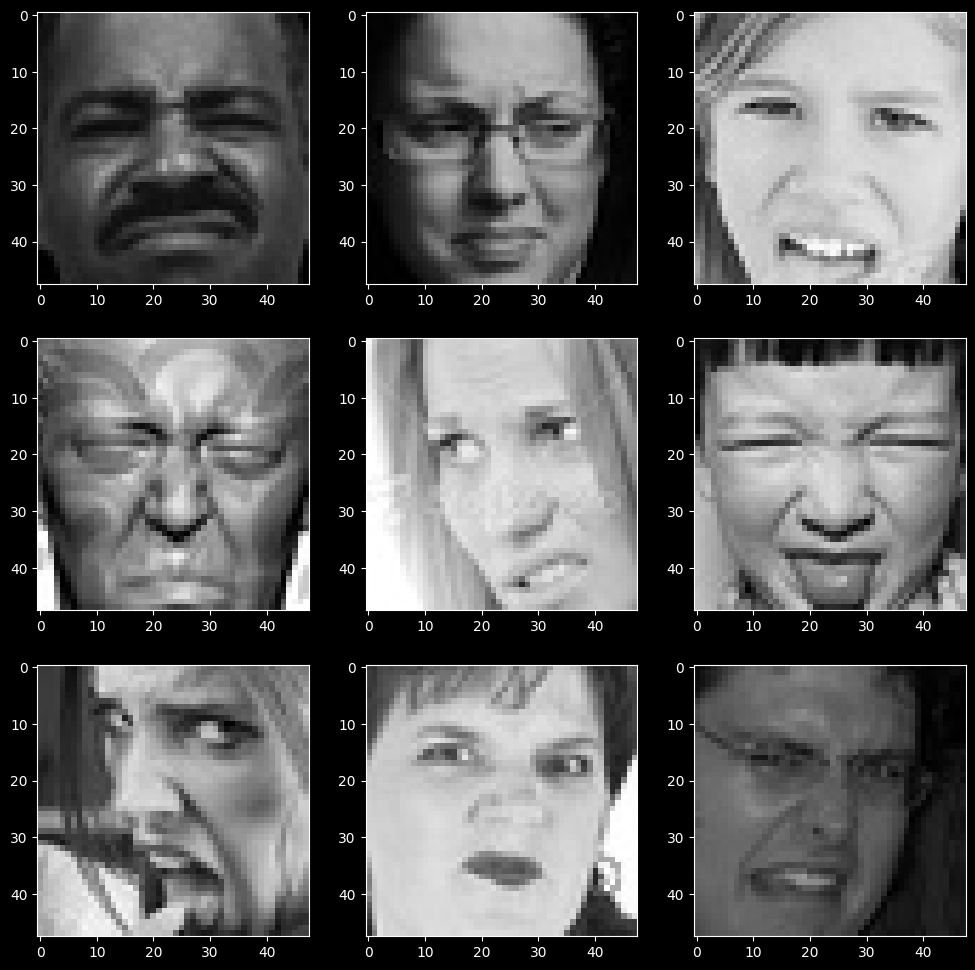

In [ ]:
expression = 'disgust'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path+"train/"+expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()